In [115]:
import pandas as pd
import matplotlib.pyplot as plt
from pyvis import network as net
import networkx as nx
from utils import input

In [121]:
data, edges = input.read_to_df("input_files/Deutschlands_Nachbarn.txt")

In [163]:
G = nx.Graph()
for d in data.index:
    G.add_node(d, size=data.loc[d, 'value'], x=data.loc[d, 'x'], y=data.loc[d, 'y'])
for e0, e1 in list(zip(edges['node_0'].tolist(), edges['node_1'].tolist())):
    G.add_edge(e0, e1)

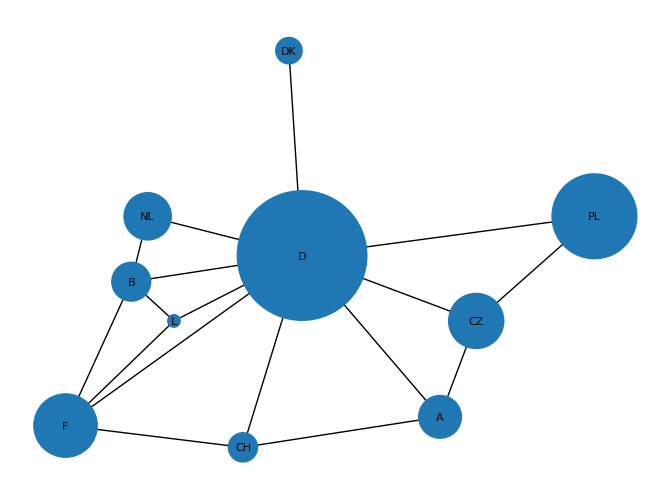

In [158]:
def visualize_nx_graph(graph: nx.Graph, data: pd.DataFrame):
    initial_pos = {node: (data.loc[node, 'x'], data.loc[node, 'y']) for node in graph.nodes}

    node_sizes = [data.loc[node, 'value'] for node in graph.nodes]
    nx.draw(G, pos=initial_pos, with_labels=True, node_size=node_sizes,  font_size=8)
    # node_color='skyblue', edge_color='black',

    plt.axis("off")
    plt.show()

visualize_nx_graph(G, data)

In [276]:
def visualize_with_pyvis_from_nx(graph: nx, display: bool = False):
    nt = net.Network(notebook=display, directed=False)
    if display:
        nt.prep_notebook()
    
    nt.from_nx(graph, show_edge_weights=False, edge_scaling=True)

    nt.toggle_physics(True)
    if display:
        return nt.show('nx.html')
    else:
        nt.show_buttons()
        print("Generating html file.")
        nt.generate_html(name="nx.html", local=True, notebook=True)
        return nt

In [321]:
def visualize_with_pyvis_from_df(data: pd.DataFrame, edges: pd.DataFrame, display: bool = False):
    nt = net.Network(notebook=True, directed=False, cdn_resources='in_line')
    
    for d in data.index:
        nt.add_node(d, size=data.loc[d, 'value'], value=data.loc[d, 'value'], x=data.loc[d, 'x'], y=data.loc[d, 'y'])
    for e0, e1 in list(zip(edges['node_0'].tolist(), edges['node_1'].tolist())):
        nt.add_edge(e0, e1)

    nt.options.edges.smooth.enabled = False
    nt.options.interaction.zoomView = False
    nt.options.interaction.dragView = False
    
    nt.barnes_hut(gravity=-900, central_gravity=4, spring_length=0.01, spring_strength=0.1, damping=0.5, overlap=0.1)
    if not display:
        nt.show_buttons(filter_=['physics'])
        print("Generating html file. nx1.html")
        nt.generate_html(name="nx1.html", notebook=False)

    nt.prep_notebook()
    return nt.show('nx1.html')

visualize_with_pyvis_from_df(data, edges, display=True)

nx1.html
